# Train TransOCR Model
Model from:
https://github.com/FudanVI/benchmarking-chinese-text-recognition/blob/main/models/TransOCR/model/transocr.py


In [1]:
# Setup path in .env file
import os
from dotenv import load_dotenv
import cv2
import numpy as np

# Get absolut path to proeject root
load_dotenv()
data_path = os.getenv("PUBTABNET_DATA_DIR")

project_root_dir = os.path.dirname(os.path.abspath("./"))
print("Project root dir:", project_root_dir)

data_dir = os.getenv("PUBTABNET_DATA_DIR")
absolute_dir = project_root_dir + data_dir
print("Absolute path:", absolute_dir)

Project root dir: /Users/leonremke/Documents/GIT_REPOS/UNI/neural_networks_seminar
Absolute path: /Users/leonremke/Documents/GIT_REPOS/UNI/neural_networks_seminar/pubtabnet


In [2]:
image_dir = f"{absolute_dir}/train"
label_file = f"{absolute_dir}/PubTabNet_2.0.0.jsonl"
output_file = f"{absolute_dir}/subset_train.jsonl"
split_filter = "train"
subset_size =300  # Number of entries in the subset

In [3]:
# import jsonlines
# import os
# import pandas as pd
# import time

# # Load the JSONL data into a Pandas DataFrame
# data = []
# with open(label_file, 'r') as input_reader:
#     for item in jsonlines.Reader(input_reader):
#         data.append(item)
# df = pd.DataFrame(data)
# print("Datadrame created")
# # Get a list of image filenames in the image directory
# image_filenames = [filename for filename in os.listdir(image_dir) if filename.endswith(".png")]
# print(f"Found {len(image_filenames)} image files in {image_dir}")
# # Start the timer
# start_time = time.time()

# # Perform filtering using Pandas DataFrame operations
# filtered_df = df[(df["split"] == split_filter) & (df["filename"].isin(image_filenames))]

# # Limit the output to a maximum of 300 rows
# filtered_df = filtered_df.head(subset_size)

# # Stop the timer
# end_time = time.time()
# elapsed_time = end_time - start_time
# print(f"Filtering took {elapsed_time:.2f} seconds")

# # Optionally, save the filtered data to a new JSONL file
# filtered_df.to_json(output_file, orient="records", lines=True)


Datadrame created
Found 500777 image files in /Users/leonremke/Documents/GIT_REPOS/UNI/neural_networks_seminar/pubtabnet/train
Filtering took 3.20 seconds


In [4]:

# subsample_small_df = filtered_df.sample(n=subset_size, random_state=42)
# subsample_small_df.to_json(f"{absolute_dir}/subset_small_val.json", orient="records", lines=True)

In [5]:
from paddle_dataset import PaddleOCRDataset, ResizeNormalize
from torch.utils.data import DataLoader
transform = ResizeNormalize(size=(256, 256))
train_dataset = PaddleOCRDataset(image_dir=image_dir, label_file=output_file, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)


Image names initialised
Label data loaded


In [6]:
def create_alphabet_file(alphabet, file_path):
    with open(file_path, 'w') as f:
        f.write("START\n")
        for char in alphabet:
            f.write(char + "\n")
        f.write("END\n")

# Replace these with your actual ground truth labels
gt_labels = train_loader.dataset.labels
alph_labels = []
for label in gt_labels:
    label_tokens = [cell["tokens"] for cell in label["html"]["cells"]]
    label = " ".join(" ".join(tokens) for tokens in label_tokens)
    label = label.replace("<b>", " ").replace("</b>", " ")
    alph_labels.append(label)
print("Ground truth labels loaded: ", len(alph_labels), alph_labels)

unique_chars = set()
unique_radicals = set()

# Loop through ground truth labels to extract unique characters and radicals
for label in alph_labels:
    for char in label:
        unique_chars.add(char)
        # You might need to extract radicals from each character here if using decomposition

# Define the file paths for character and radical alphabets
char_alphabet_file_path = f"{absolute_dir}/character_alphabet_train.txt"
radical_alphabet_file_path = f"{absolute_dir}/radical_alphabet_train.txt"

# Create character alphabet file
create_alphabet_file(unique_chars, char_alphabet_file_path)
print(f"Character alphabet file created at: {char_alphabet_file_path}")

# Create radical alphabet file (if needed)
# create_alphabet_file(unique_radicals, radical_alphabet_file_path)
# print(f"Radical alphabet file created at: {radical_alphabet_file_path}")

Ground truth labels loaded:  300 ['  V a r i a b l e     H a z a r d   r a t i o     9 5   %   C I     <i> p </i>   v a l u e *   A g e   ( m e d i a n )   0 . 7 1 6   ≤ 6 9 1 . 0 0 0     > 6 9 0 . 8 3 9 0 . 3 1 0 – 2 . 2 6 8  G e n d e r   0 . 1 4 2   M a l e 1 . 0 0 0     F e m a l e 0 . 4 2 6 0 . 1 5 2 – 1 . 1 9 0  T y p e   o f   s u r g e r y   0 . 0 1 0   L o w   a n t e r i o r   r e s e c t i o n 1 . 0 0 0     A b d o m i n o p e r i n e a l   r e s e c t i o n 3 . 1 4 0 0 . 9 1 9 – 1 0 . 7 2 5  T u m o r   l o c a t i o n   0 . 7 1 0   U p p e r   r e c t u m 1 . 0 0 0     M i d d l e   r e c t u m 1 . 2 6 7 0 . 3 8 1 – 4 . 2 1 3    L o w   r e c t u m 1 . 7 1 6 0 . 4 1 9 – 7 . 0 2 6  G r a d e   o f   d i f f e r e n t i a t i o n   0 . 9 3 6   G 1 1 . 0 0 0     G 2 1 . 9 3 3 0 . 4 1 6 – 3 . 4 2 3    G 3 1 . 1 1 9 0 . 1 3 7 – 9 . 1 3 7  H i s t o l o g i c   t y p e   0 . 2 9 9   A d e n o c a r c i n o m a 1 . 0 0 0     A d e n o c a r c i n o m a   w i t h   m u c i n o u s

In [8]:
# Set configuration for training:
import torch
import torch.nn as nn
import torch.optim as optim
from transocr import Transformer
from collections import namedtuple
from utils import converter
# Define the named tuple
Args = namedtuple('Args', [
    'description',
    'exp_name',
    'batch_size',
    'lr',
    'epoch',
    'radical',
    'test',
    'resume',
    'train_dataset',
    'test_dataset',
    'imageH',
    'imageW',
    'coeff',
    'alpha_path',
    'alpha_path_radical',
    'decompose_path'
])

# Create an instance of the Args named tuple
args = Args(
    description='',
    exp_name='test',
    batch_size=2,
    lr=1.0,
    epoch=1,
    radical=False,
    test=False,
    resume='',
    train_dataset='',
    test_dataset='',
    imageH=256,
    imageW=256,
    coeff=1.0,
    alpha_path=char_alphabet_file_path,
    alpha_path_radical=radical_alphabet_file_path,
    decompose_path='../pubtabnet/decompose.txt'
)
print(args.alpha_path)

/Users/leonremke/Documents/GIT_REPOS/UNI/neural_networks_seminar/pubtabnet/character_alphabet_train.txt


In [10]:
model = Transformer(args)
model = nn.DataParallel(model)
optimizer = optim.Adadelta(model.parameters(), lr=args.lr, rho=0.9, weight_decay=1e-4)
criterion = torch.nn.CrossEntropyLoss()
best_acc = -1

def train(epoch, iteration, image, length, text_input, text_gt, length_radical, radical_input, radical_gt):
    model.train()
    optimizer.zero_grad()
    result = model(image, length, text_input, length_radical, radical_input)

    text_pred = result['pred']
    loss_char = criterion(text_pred, text_gt)
    loss = loss_char
    print('epoch : {} | iter : {}/{} | loss : {}'.format(epoch, iteration, len(train_loader), loss))
    loss.backward()
    optimizer.step()

print('-------------')
for epoch in range(args.epoch):
    torch.save(model.state_dict(), './history/{}/model.pth'.format(args.exp_name))
    dataloader = iter(train_loader)
    train_loader_len = len(train_loader)
    for iteration in range(train_loader_len):
        data = next(dataloader)
        image, label = data
        image = torch.nn.functional.interpolate(image, size=(args.imageH, args.imageW))

        length, text_input, text_gt, length_radical, radical_input, radical_gt, string_label = converter(label, args)
        train(epoch, iteration, image, length, text_input, text_gt, length_radical, radical_input, radical_gt)

Args(description='', exp_name='test', batch_size=2, lr=1.0, epoch=1, radical=False, test=False, resume='', train_dataset='', test_dataset='', imageH=256, imageW=256, coeff=1.0, alpha_path='/Users/leonremke/Documents/GIT_REPOS/UNI/neural_networks_seminar/pubtabnet/character_alphabet_train.txt', alpha_path_radical='/Users/leonremke/Documents/GIT_REPOS/UNI/neural_networks_seminar/pubtabnet/radical_alphabet_train.txt', decompose_path='../pubtabnet/decompose.txt')
-------------
epoch : 0 | iter : 0/300 | loss : 5.823660850524902
epoch : 0 | iter : 1/300 | loss : 6.83551549911499
epoch : 0 | iter : 2/300 | loss : 3.0739595890045166
epoch : 0 | iter : 3/300 | loss : 4.864850997924805
epoch : 0 | iter : 4/300 | loss : 5.786526203155518
epoch : 0 | iter : 5/300 | loss : 3.2068090438842773
epoch : 0 | iter : 6/300 | loss : 3.7124786376953125
epoch : 0 | iter : 7/300 | loss : 2.5593416690826416
epoch : 0 | iter : 8/300 | loss : 3.6707229614257812
epoch : 0 | iter : 9/300 | loss : 2.73280239105224

RuntimeError: The size of tensor a (7868) must match the size of tensor b (7000) at non-singleton dimension 1

In [18]:
import matplotlib.pyplot as plt
def sample_prediction(image, length, text_input, text_gt):
    result = model(image, length, text_input, length_radical, radical_input)
    text_pred = result['pred']
    loss_char = criterion(text_pred, text_gt)
    loss = loss_char
    print("Loss: ", loss)
    # Plot image itself
    plt.imshow(image[0].permute(1, 2, 0))
    return loss, result['pred']

In [19]:
# label_file_small_val = f"{absolute_dir}/subset_small_val.json"
# image_dir_val = f"{absolute_dir}/val"
# train_dataset = PaddleOCRDataset(image_dir=image_dir_val, label_file=label_file_small_val, split_filter='val', transform=transform)
# train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)

data = next(iter(train_loader))
image, label = data
print("Image shape: ", image.shape)


Image shape:  torch.Size([1, 3, 256, 256])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Loss:  tensor(2.1849, grad_fn=<NllLossBackward0>)
Prediction:  tensor([[-0.6051, -0.4534, -0.8806,  ...,  1.6233,  1.2554,  4.4804],
        [-1.0746, -1.4004, -1.5989,  ...,  2.9154,  2.7370,  2.3238],
        [-1.0888, -1.3812, -1.5840,  ...,  2.8695,  2.7206,  2.3321],
        ...,
        [-1.0860, -1.4060, -1.5733,  ...,  2.8913,  2.6994,  2.3341],
        [-0.5148, -0.4314, -1.0834,  ...,  1.2655,  0.6298,  5.5281],
        [-1.0970, -1.3887, -1.5629,  ...,  2.9201,  2.7206,  2.3349]],
       grad_fn=<CopySlices>)
Ground truth:  tensor([ 32,  32, 170,  32,  10,  32, 112,  32, 158,  32,  90,  32,  48,  32,
         32,  32,  32,  32, 102,  32, 126,  32, 124,  32, 124,  32,  32,  32,
         62,  32,  60,  32, 146,  32, 100,  32, 124,  32,  10,  32,  32,  32,
        142,  32, 173,  32,  32,  32, 140,  32,  32,  32, 104,  32,  28,  32,
         36,  32,  64,  32, 150,  32, 152,  32,  32,  32,  32,  32,  86,  32,
         90,  32, 126,  32,  40,  32, 158,  32,  10,  32, 122,  32,  

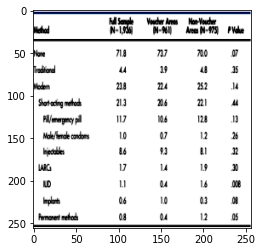

In [20]:

length, text_input, text_gt, length_radical, radical_input, radical_gt, string_label = converter(label, args)
loss, result_pred = sample_prediction(image, length, text_input, text_gt)
print("Prediction: ", result_pred)
print("Ground truth: ", text_gt)

In [1]:
# Tensor prediction to text again
from utils import get_alphabet
import torch.nn.functional as F

def tensor_to_text(tensor, alphabet):
    text = ""
    for char_index in tensor:
        if char_index == 0:
            break
        text += alphabet[char_index]
    return text

# Load the character alphabet
probabilities = F.softmax(result_pred, dim=-1)
predicted_indices = torch.argmax(probabilities, dim=-1)
alphabet = get_alphabet(args, 'char')
tensor_to_text(predicted_indices, alphabet)

NameError: name 'result_pred' is not defined